In [1]:
import acquire
import prepare
import wrangle
import explore
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:20,.2f}'.format
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

In [2]:
#df = wrangle.get_zillow_data()
train, validate, test = wrangle.clean_zillow(wrangle.get_zillow_data()) 
train.shape, validate.shape, test.shape

((43332, 21), (18572, 21), (15476, 21))

In [6]:
# Set option to see all colums in dataframe
pd.set_option('display.max_columns', None)
train.head(1)

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,heatingorsystemdesc,propertylandusedesc,county
14505,1,2,936,34.07,-117.76,4057,60374023,96508,0,1,1924,"8,877.00","19,208.00",2016,"10,331.00",413.73,"60,374,023,033,004.00",-0.04,Floor/Wall,Single Family Residential,Los Angeles


#### Basic Visualizations (Train)

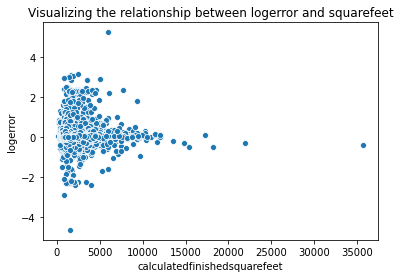

In [7]:
# How bedroomcount affects the relationship between squarefeet and logerror

sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror',
               data=train)
plt.title("Visualizing the relationship between logerror and squarefeet")
plt.show()

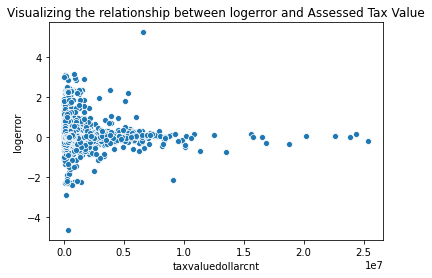

In [11]:
# How tax value affects logerror

sns.scatterplot(x='taxvaluedollarcnt', y='logerror',
               data=train)
plt.title("Visualizing the relationship between logerror and Assessed Tax Value")
plt.show()

#### New Dataframes based on County w/ Outliers Removed

In [3]:
# Split in to train df per county, remove outliers using IQR (6)

la_train_df, vc_train_df, oc_train_df = explore.counties_no_outliers(train)
la_train_df.shape, vc_train_df.shape, oc_train_df.shape

((23029, 21), (2036, 21), (6540, 21))

#### Basic Visualizations w/Outliers Removed (Per County)

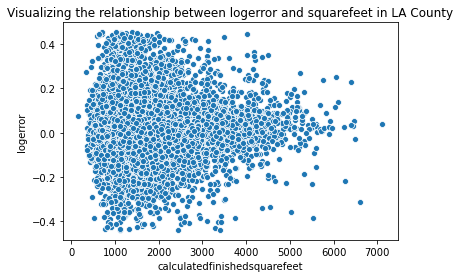

In [8]:
# How bedroomcount affects the relationship between squarefeet and logerror (La County)

sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror',
               data=la_train_df)
plt.title("Visualizing the relationship between logerror and squarefeet in LA County")
plt.show()

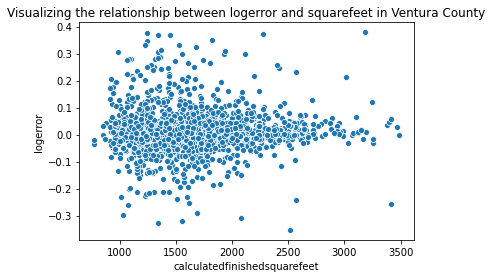

In [9]:
# How bedroomcount affects the relationship between squarefeet and logerror (Ventura County)

sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror',
               data=vc_train_df)
plt.title("Visualizing the relationship between logerror and squarefeet in Ventura County")
plt.show()

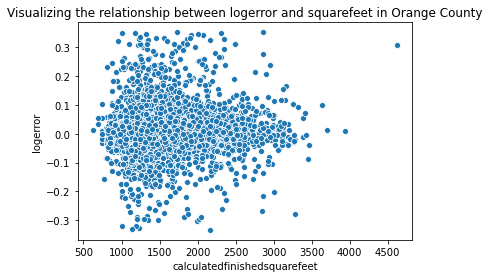

In [10]:
# How bedroomcount affects the relationship between squarefeet and logerror (Orange County)

sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror',
               data=oc_train_df)
plt.title("Visualizing the relationship between logerror and squarefeet in Orange County")
plt.show()

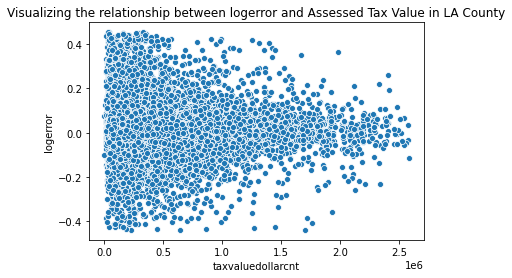

In [12]:
# How tax value affects logerror in LA County

sns.scatterplot(x='taxvaluedollarcnt', y='logerror',
               data=la_train_df)
plt.title("Visualizing the relationship between logerror and Assessed Tax Value in LA County")
plt.show()

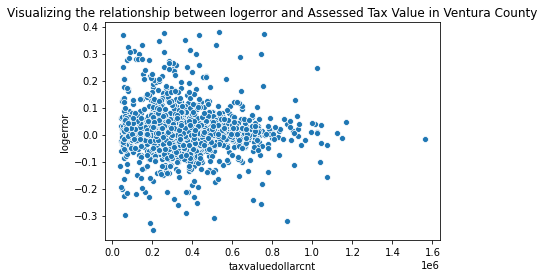

In [13]:
# How tax value affects logerror in Ventura County

sns.scatterplot(x='taxvaluedollarcnt', y='logerror',
               data=vc_train_df)
plt.title("Visualizing the relationship between logerror and Assessed Tax Value in Ventura County")
plt.show()

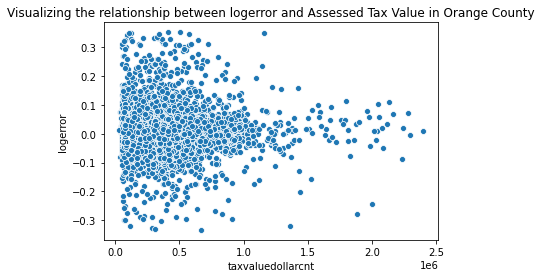

In [14]:
# How tax value affects logerror in Orange County

sns.scatterplot(x='taxvaluedollarcnt', y='logerror',
               data=oc_train_df)
plt.title("Visualizing the relationship between logerror and Assessed Tax Value in Orange County")
plt.show()